### Visualize bounding box 

This notebook shows examples of the data with bounding boxes, the boxes boxes were annotated by someone else on kaggle. We show examples of boxes on top of the images and how the images look after zoomin in on the box. We will try to predict the boxes using a conv net in order to enhance the trainingsdata.

In [2]:
import sys

print(sys.executable)

/Users/pieter/anaconda2/envs/medim/bin/python


In [3]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os 
import sys
import glob
import scipy.misc as spm
import json
import pprint
import pandas as pd


In [4]:
train_data = pd.read_csv('../data/validation/train.csv')
train_data

,filename,label
0,img_03596.jpg,YFT
1,img_04307.jpg,ALB
2,img_01457.jpg,LAG
3,img_00617.jpg,ALB
4,img_06550.jpg,YFT
5,img_00957.jpg,ALB
6,img_00848.jpg,OTHER
7,img_07291.jpg,ALB
8,img_02772.jpg,DOL
9,img_06716.jpg,ALB


In [5]:
example = train_data.iloc[0]
print example.filename
print example.label

img_03596.jpg
YFT


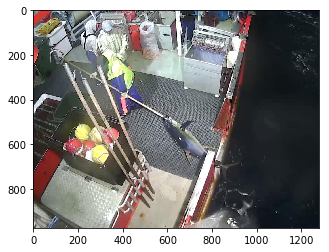

In [6]:
filename = '../data/train/{}/{}'.format(example.label, example.filename)
image = spm.imread(filename)
plt.imshow(image)
plt.show()

In [7]:
# Example how to extract the good labels
# Only using the first index, should become the largest??
height, width, co_x, co_y = None, None, None, None
with open('../data/boxes/{}_labels.json'.format(example.label.lower())) as data_file:
    data = json.load(data_file)
    for i in range(len(data)):
        path = '../data/train/{}/{}'.format(example.label, example.filename)
        if data[i]['filename'] == path:
            height = data[i]['annotations'][0]['height']
            width = data[i]['annotations'][0]['width']
            co_x = data[i]['annotations'][0]['x']
            co_y = data[i]['annotations'][0]['y']

fig, ax = plt.subplots(1)
ax.imshow(image)
plt.xlim(co_x, co_x+width)
plt.ylim(co_y+height, co_y)
plt.show()

IOError: [Errno 2] No such file or directory: '../data/boxes/yft_labels.json'